In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_ct = pd.read_csv('click_train.csv')

In [3]:
df_ct.head(10)

,displayId,adId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1
5,1214987,7125,0
6,1214987,7092,1
7,1214987,5652,0
8,1248098,7182,0
9,1248098,17,1


In [4]:
df_ct.shape

(3642244, 3)

In [5]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642244 entries, 0 to 3642243
Data columns (total 3 columns):
displayId    int64
adId         int64
clicked      int64
dtypes: int64(3)
memory usage: 83.4 MB


In [6]:
new_df_ct = df_ct.copy()

In [7]:
new_df_ct

,displayId,adId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1
...,...,...,...
3642239,4706267,5279,0
3642240,4706267,5271,0
3642241,4706267,5316,0
3642242,4706267,237,0


In [8]:
new_df_ct = new_df_ct.groupby(['adId']).\
                    agg({'clicked' : 'sum'})
new_df_ct

,clicked
adId,
6,6945
7,610
8,2463
11,416
13,372
...,...
7177,20
7178,85
7179,31


In [9]:
new_df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 6 to 7182
Data columns (total 1 columns):
clicked    2616 non-null int64
dtypes: int64(1)
memory usage: 40.9 KB


In [10]:
new_df_ct['clicked'].max()

25059

In [11]:
new_df_ct['clicked'].min()

0

In [12]:
new_df_ct['clicked'].mean()

310.51337920489294

In [13]:
new_df_ct['clicked'].median()

46.0

In [14]:
new_df_ct[(new_df_ct['clicked'] > 46)].median()

clicked    208.0
dtype: float64

In [15]:
new_df_ct[(new_df_ct['clicked'] < 46)].median()

clicked    9.0
dtype: float64

In [16]:
new_df_ct.sort_values(by=['clicked'], inplace=True)

In [17]:
new_df_ct

,clicked
adId,
2479,0
4750,0
5637,0
4749,0
2080,0
...,...
5447,10833
28,11679
1013,12421


In [18]:
def rating_function(x):
    if x >= 208:
        return 1
    elif x < 208 and x >= 46:
        return 2
    elif x < 46 and x >= 9:
        return 3
    else:
        return 4

new_df_ct["result"] = new_df_ct["clicked"].apply(rating_function)
new_df_ct

,clicked,result
adId,,
2479,0,4
4750,0,4
5637,0,4
4749,0,4
2080,0,4
...,...,...
5447,10833,1
28,11679,1
1013,12421,1


In [19]:
new_df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 2479 to 17
Data columns (total 2 columns):
clicked    2616 non-null int64
result     2616 non-null int64
dtypes: int64(2)
memory usage: 61.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EB0CF0888>,
      dtype=object)

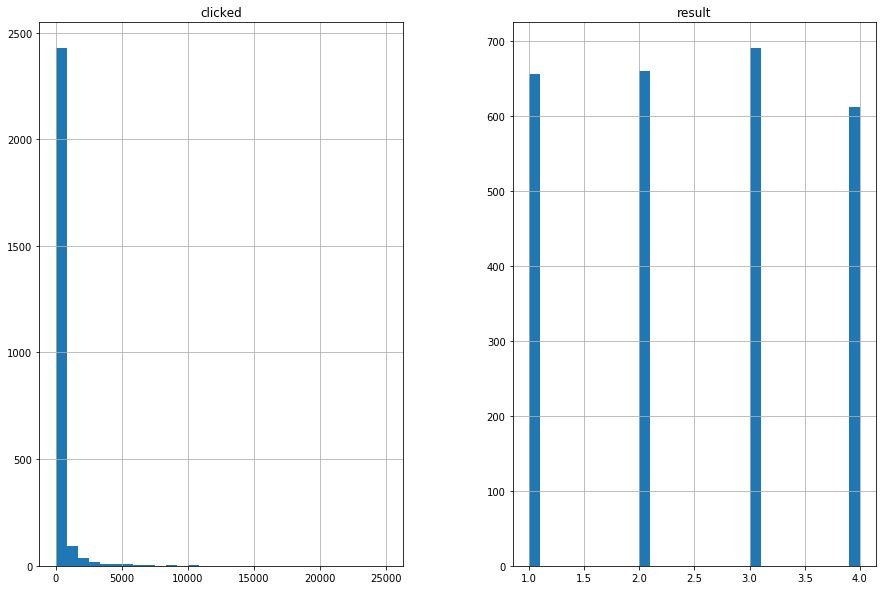

In [20]:
new_df_ct.hist(bins=30, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EB11D70C8>,
      dtype=object)

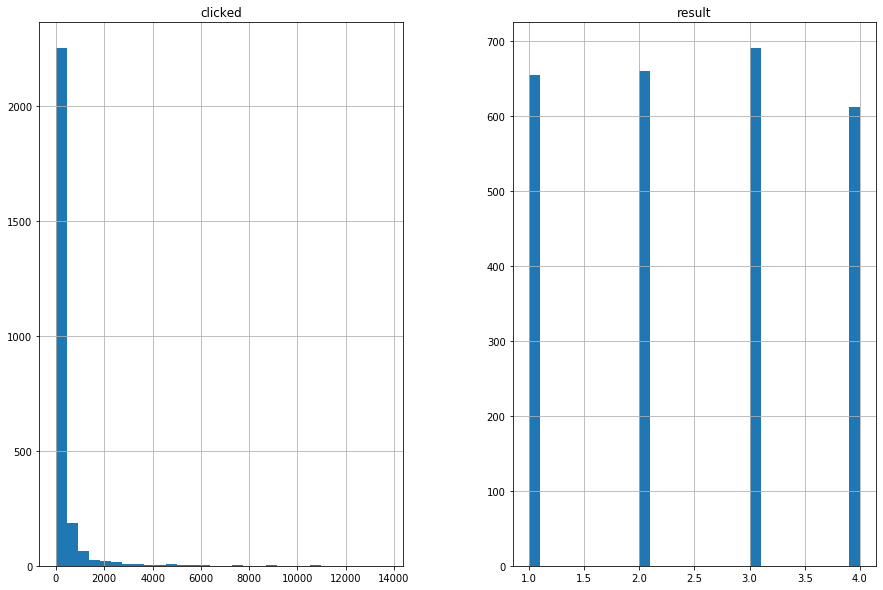

In [21]:
new_df_ct[new_df_ct.clicked != 25059].hist(bins=30, figsize=(15, 10))

In [22]:
new_df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 2479 to 17
Data columns (total 2 columns):
clicked    2616 non-null int64
result     2616 non-null int64
dtypes: int64(2)
memory usage: 61.3 KB


In [23]:
del(df_ct)

In [24]:
df_test = pd.read_csv('click_test.csv')

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199048 entries, 0 to 1199047
Data columns (total 2 columns):
displayId    1199048 non-null int64
adId         1199048 non-null int64
dtypes: int64(2)
memory usage: 18.3 MB


In [26]:
df_test

,displayId,adId
0,151650,7585
1,151650,6257
2,151650,6690
3,151938,7454
4,151938,7370
...,...,...
1199043,1328957,7039
1199044,1328976,7167
1199045,1328976,535
1199046,1328976,7174


In [27]:
df_test[ (df_test['displayId'].isnull())]

,displayId,adId


In [28]:
new_df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 2479 to 17
Data columns (total 2 columns):
clicked    2616 non-null int64
result     2616 non-null int64
dtypes: int64(2)
memory usage: 61.3 KB


In [29]:
result = pd.merge(df_test, new_df_ct, on='adId', how='outer')
result

,displayId,adId,clicked,result
0,151650.0,7585,NaN,NaN
1,240394.0,7585,NaN,NaN
2,244567.0,7585,NaN,NaN
3,244664.0,7585,NaN,NaN
4,244777.0,7585,NaN,NaN
...,...,...,...,...
1200949,NaN,529,9764.0,1.0
1200950,NaN,538,10450.0,1.0
1200951,NaN,5486,10562.0,1.0
1200952,NaN,5447,10833.0,1.0


In [30]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200954 entries, 0 to 1200953
Data columns (total 4 columns):
displayId    1199048 non-null float64
adId         1200954 non-null int64
clicked      806370 non-null float64
result       806370 non-null float64
dtypes: float64(3), int64(1)
memory usage: 45.8 MB


In [31]:
result = result.drop('clicked', axis=1)

In [32]:
result = result.dropna(subset=['displayId'])

In [33]:
#result = result.dropna() -> خیلی اضافی حذف میکنه

In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199048 entries, 0 to 1199047
Data columns (total 3 columns):
displayId    1199048 non-null float64
adId         1199048 non-null int64
result       804464 non-null float64
dtypes: float64(2), int64(1)
memory usage: 36.6 MB


In [35]:
result.isna().sum()

displayId         0
adId              0
result       394584
dtype: int64

In [36]:
result = result.fillna(4)

In [37]:
result.isna().sum()

displayId    0
adId         0
result       0
dtype: int64

In [38]:
result.sort_values(by=['displayId'], inplace=True)
result

,displayId,adId,result
0,151650.0,7585,4.0
7056,151650.0,6690,1.0
5941,151650.0,6257,2.0
7057,151938.0,6690,1.0
8907,151938.0,7454,4.0
...,...,...,...
123692,1328957.0,6515,1.0
855691,1328976.0,7167,2.0
693743,1328976.0,535,1.0
498028,1328976.0,7174,2.0


In [39]:
result = result.reset_index(drop=True)
result

,displayId,adId,result
0,151650.0,7585,4.0
1,151650.0,6690,1.0
2,151650.0,6257,2.0
3,151938.0,6690,1.0
4,151938.0,7454,4.0
...,...,...,...
1199043,1328957.0,6515,1.0
1199044,1328976.0,7167,2.0
1199045,1328976.0,535,1.0
1199046,1328976.0,7174,2.0


In [40]:
result["displayId"] = result["displayId"].apply(lambda x: int(x))
result["adId"] = result["adId"].apply(lambda x: int(x))
result["result"] = result["result"].apply(lambda x: int(x))

In [41]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199048 entries, 0 to 1199047
Data columns (total 3 columns):
displayId    1199048 non-null int64
adId         1199048 non-null int64
result       1199048 non-null int64
dtypes: int64(3)
memory usage: 27.4 MB


In [42]:
result

,displayId,adId,result
0,151650,7585,4
1,151650,6690,1
2,151650,6257,2
3,151938,6690,1
4,151938,7454,4
...,...,...,...
1199043,1328957,6515,1
1199044,1328976,7167,2
1199045,1328976,535,1
1199046,1328976,7174,2


In [43]:
#result[result['result'] >= 3].head()

In [44]:
result.to_csv("result.csv", header=None, index=False)